# 07: Unsupervised Learning - Clustering and Dimensionality Reduction

## Overview
This notebook covers unsupervised learning - clustering and dimensionality reduction techniques essential for machine learning and deep learning.

## Topics Covered:
1. K-Means
2. Hierarchical Clustering
3. DBSCAN
4. PCA
5. t-SNE
6. UMAP

## Focus Points:
- Understanding core concepts
- Practical implementation
- When to apply each technique
- Common pitfalls and solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## Key Concepts

This notebook covers:

- KMeans clustering
- Dendrogram visualization
- Density-based clustering
- Principal Component Analysis
- Manifold learning

## Implementation Examples

The following sections provide practical implementations of the concepts above.

In [2]:
# Example 1: Basic setup and data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Number of features: {X.shape[1]}')

Training samples: 800
Test samples: 200
Number of features: 20


## 1. K-Means Clustering

K-Means Clustering Results:
Inertia: 203.89
Silhouette Score: 0.8756
Davies-Bouldin Score: 0.1737


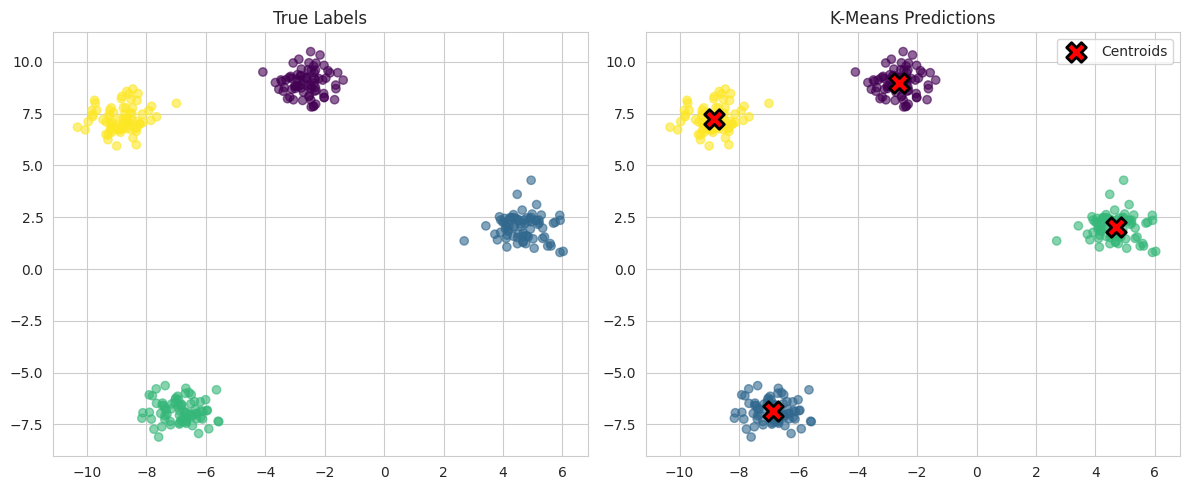

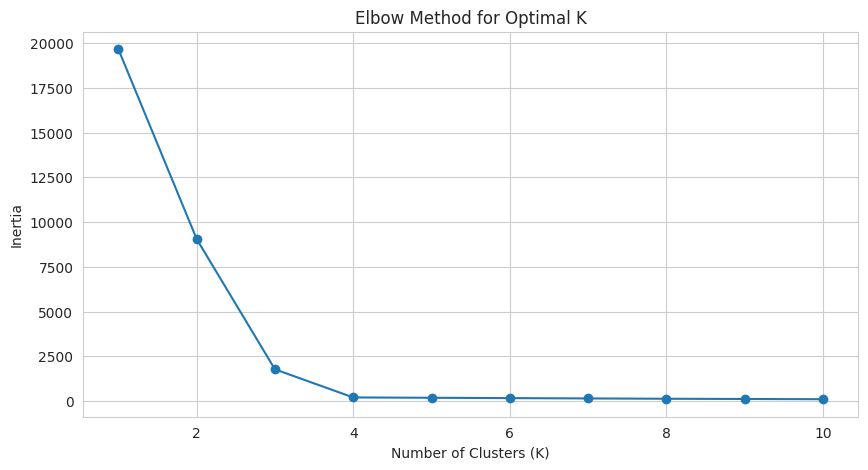

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

print('K-Means Clustering Results:')
print(f'Inertia: {kmeans.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(X, y_kmeans):.4f}')
print(f'Davies-Bouldin Score: {davies_bouldin_score(X, y_kmeans):.4f}')

# Visualize clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.title('True Labels')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=200, c='red', marker='X', edgecolors='black', linewidths=2, label='Centroids')
plt.title('K-Means Predictions')
plt.legend()
plt.tight_layout()
plt.show()

# Elbow method
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

## 2. Hierarchical Clustering

Hierarchical Clustering Results:
Silhouette Score: 0.8756


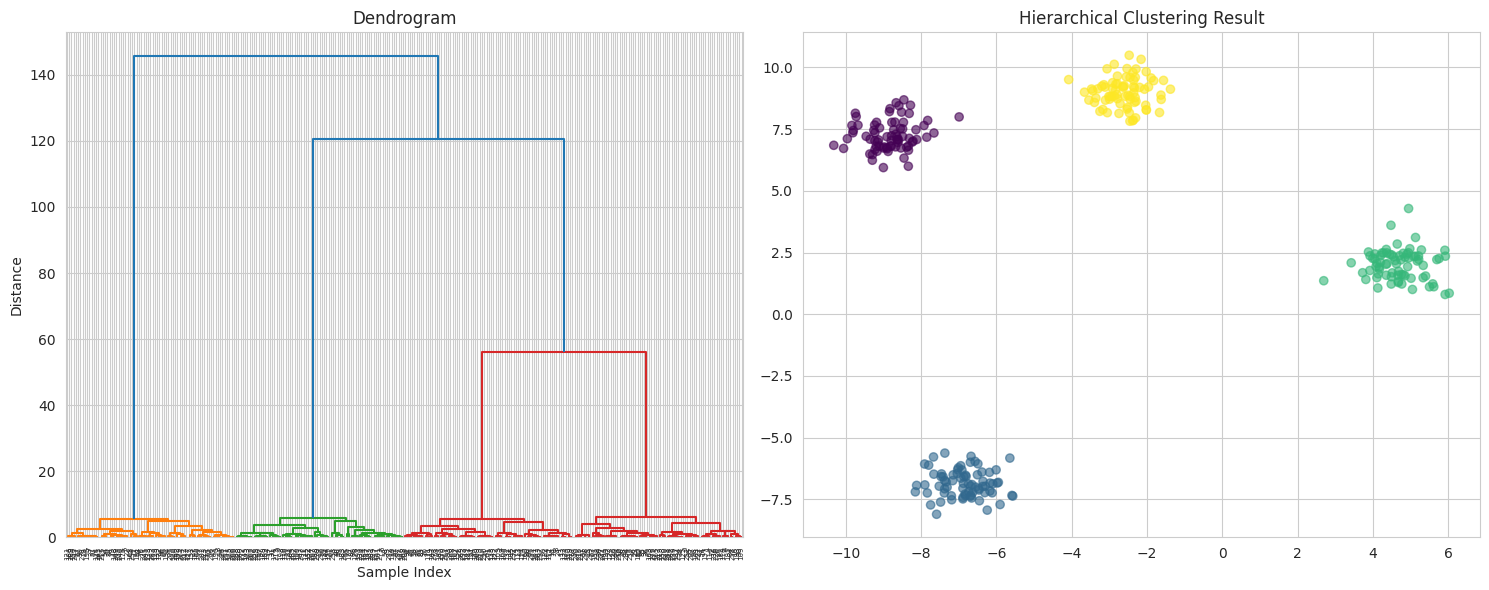

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hierarchical = hierarchical.fit_predict(X)

print('Hierarchical Clustering Results:')
print(f'Silhouette Score: {silhouette_score(X, y_hierarchical):.4f}')

# Create dendrogram
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering Result')
plt.tight_layout()
plt.show()

## 3. DBSCAN

DBSCAN Results:
Number of clusters: 2
Number of noise points: 0
Silhouette Score: 0.3308


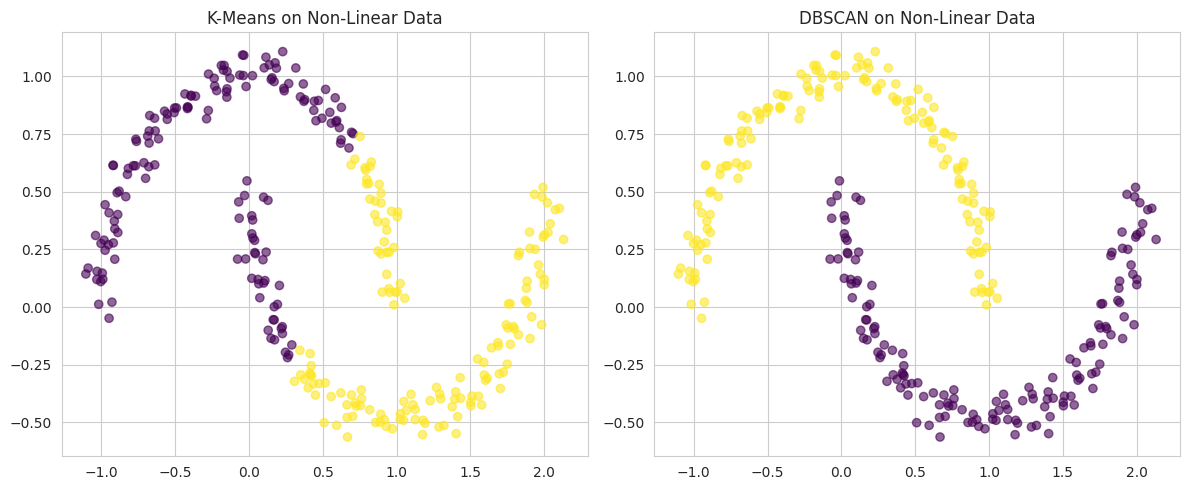

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate data with non-linear structure
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# Count clusters (excluding noise points labeled as -1)
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

print('DBSCAN Results:')
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
if n_clusters > 1:
    print(f'Silhouette Score: {silhouette_score(X_moons, y_dbscan):.4f}')

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', alpha=0.6)
plt.title('K-Means on Non-Linear Data')
plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='viridis', alpha=0.6)
plt.title('DBSCAN on Non-Linear Data')
plt.tight_layout()
plt.show()

## 4. Principal Component Analysis (PCA)

Original shape: (1797, 64)
Reduced shape: (1797, 40)
Explained variance ratio: 0.9508
Number of components: 40


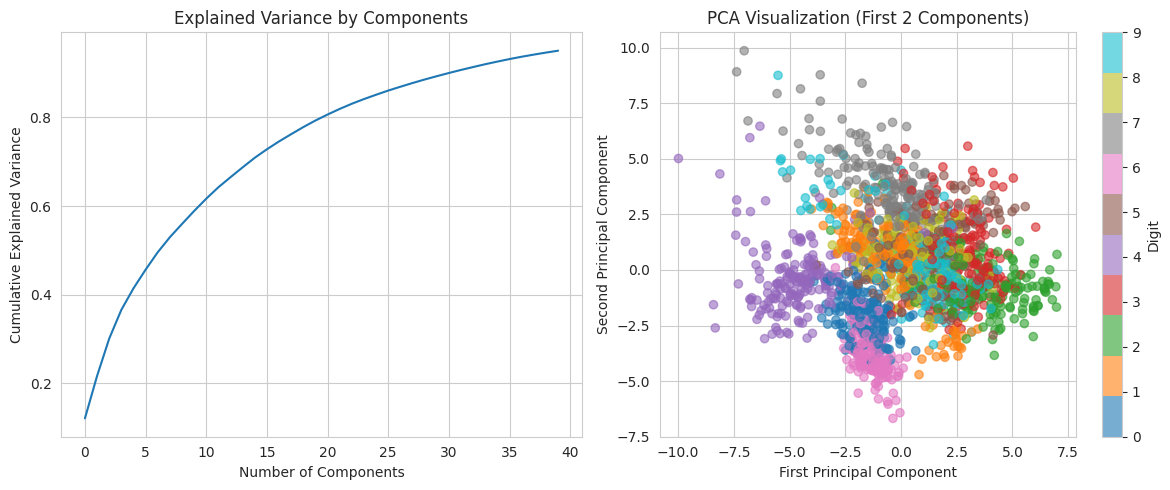

In [6]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load high-dimensional dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f'Original shape: {X_digits.shape}')

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_digits)

# PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f'Reduced shape: {X_pca.shape}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}')
print(f'Number of components: {pca.n_components_}')

# Plot explained variance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)

# Visualize first 2 components
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, cmap='tab10', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization (First 2 Components)')
plt.colorbar(scatter, label='Digit')
plt.tight_layout()
plt.show()

## 5. t-SNE

t-SNE completed


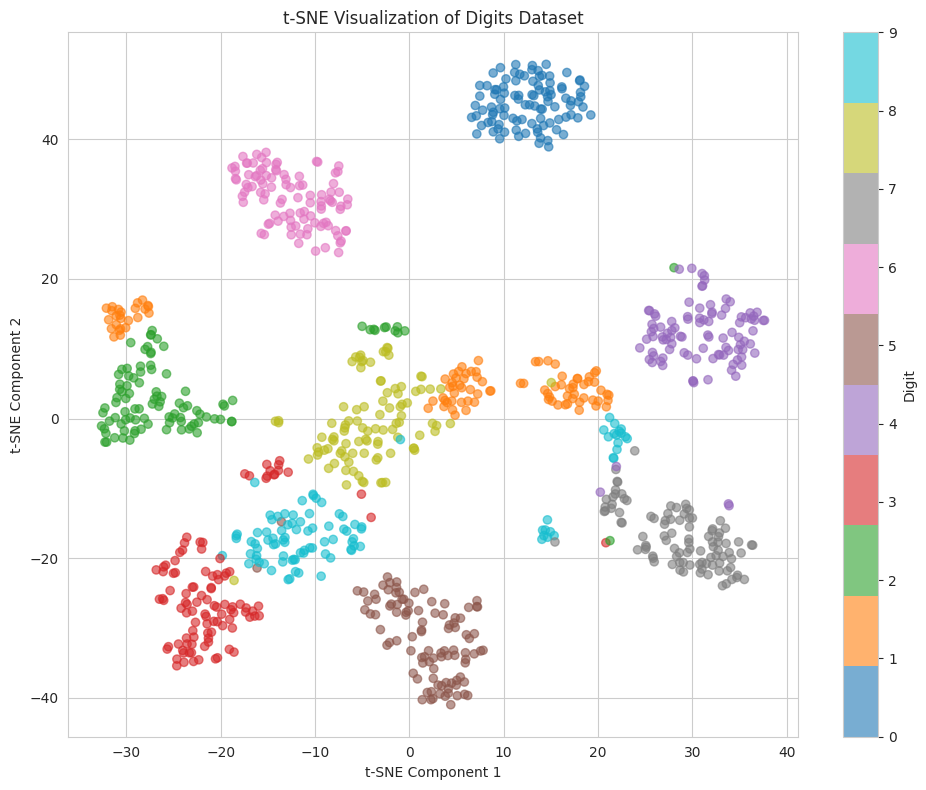


t-SNE is great for visualization but:
- Computationally expensive
- Non-deterministic (results vary between runs)
- Cannot be used for new data (no transform method)


In [7]:
from sklearn.manifold import TSNE

# t-SNE (use subset for faster computation)
X_sample = X_scaled[:1000]
y_sample = y_digits[:1000]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

print('t-SNE completed')

# Visualize
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Digits Dataset')
plt.colorbar(scatter, label='Digit')
plt.tight_layout()
plt.show()

print('\nt-SNE is great for visualization but:')
print('- Computationally expensive')
print('- Non-deterministic (results vary between runs)')
print('- Cannot be used for new data (no transform method)')

## Best Practices

1. Always split data before preprocessing
2. Use cross-validation for model evaluation
3. Monitor for overfitting/underfitting
4. Document hyperparameters and experiments
5. Start simple, then add complexity

## Questions & Answers

### Q1: What are the main concepts in Unsupervised Learning - Clustering and Dimensionality Reduction?
**Answer:** K-Means, Hierarchical Clustering, DBSCAN

### Q2: When should you apply these techniques?
**Answer:** Apply when you need to improve model performance, reduce dimensionality, or extract meaningful patterns from data.

### Q3: What are common challenges?
**Answer:** Common challenges include overfitting, computational complexity, hyperparameter tuning, and interpretation of results.

## Practice Exercises

1. Implement the core algorithms from scratch
2. Compare performance across different methods
3. Tune hyperparameters systematically
4. Apply to real-world datasets
5. Analyze and interpret results

## Additional Resources

- Scikit-learn documentation
- TensorFlow and PyTorch tutorials
- Relevant research papers
- Online courses and books